- Raw data are aviable in: 

https://metadata.icmyl.unam.mx/bitstream/handle/20.500.12201/11367/MartinezTrejo_etal_2023_TA_DIC_RawData.csv?sequence=1&isAllowed=y



- Read csv  data file

In [1]:
# Import packages
import pandas as pd
import PyCO2SYS as pyco2
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import shapiro

In [2]:
# Function to read in csv file
def read_csv(file):
    """
    Read in csv file and return pandas dataframe
    """
    df = pd.read_csv(file, sep=",", header=0,  decimal=".", encoding='utf-8')
    return df

In [3]:
# define file path 
terminos_ta_dic_data_path = "../data/MartinezTrejo_etal_2023_TA_DIC_RawData.csv"

# Read in data
terminos_ta_dic_data = read_csv(terminos_ta_dic_data_path)

# Copy data to new dataframe
terminos_ta_dic = terminos_ta_dic_data.copy()

### Calculate DIC / TA ratio 

In [4]:
import numpy as np

def calculate_linear_relationship(x, y):
    # Fit a linear model to the data (x, y)
    coefficients = np.polyfit(x, y, 1)  # Linear fit (polynomial of degree 1)
    slope, intercept = coefficients  # Unpacking the coefficients

    # Function to calculate y based on x using the found linear relationship
    def linear_model(x_new):
        return slope * x_new + intercept

    return linear_model



In [5]:
x = terminos_ta_dic["TA_micromol_kg"]
y = terminos_ta_dic["DIC_micromol_kg"]

# Create the function using the existing data
linear_function = calculate_linear_relationship(x, y)

# Example data

TA_new = np.arange(2000, 4000, 0.5)

DIC_new = linear_function(TA_new)



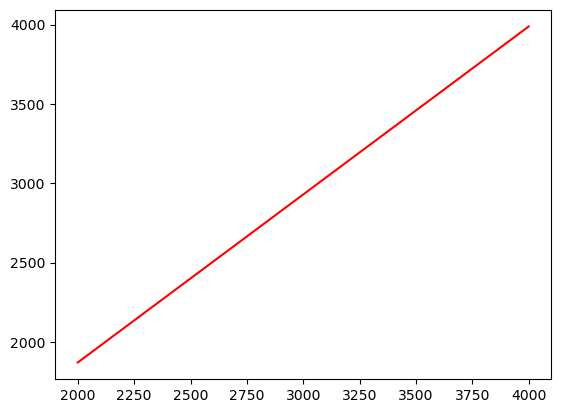

In [6]:
plt.plot(TA_new, DIC_new, label="Linear regression model", color="red")

## PyCO2SYS configuration from estuarine waters (Humphreys et al. 2022)

In [7]:

# Create dictionary with data configuration for PyCO2SYS. 
# For more information on the parameters see Humphreys et al (2022)
my_co2sys_params_dic_ta_config = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": DIC_new,
    # TA measured in the lab, Total scale
    "par2": TA_new,
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": 35,  # in-situ salinity in PSU
    # in-situ temperature (output conditions) in °C
    "temperature_out": 25,
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    "opt_k_carbonic": 15,     # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "temperature": 25      # lab temperature (input conditions) in °C
}

### Run PyCO2SYS

In [8]:
# Run PyCO2SYS to calculate the carbonate system parameters
inorganic_carbon_results= pyco2.sys(**my_co2sys_params_dic_ta_config)


### Read the interes variables from PYCO2sys 

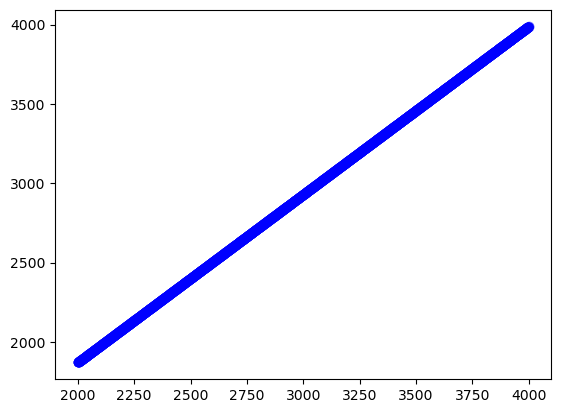

In [9]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(inorganic_carbon_results["alkalinity"], inorganic_carbon_results["dic"], color='blue', alpha=0.5)

plt.show()


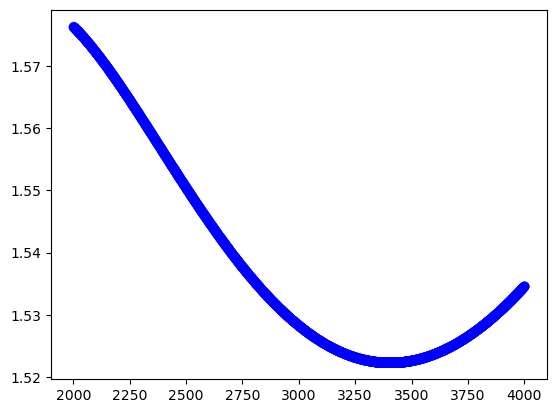

In [24]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(inorganic_carbon_results["alkalinity"], inorganic_carbon_results["saturation_aragonite"], color='blue', alpha=0.5)

plt.show()


## Ramdon salinity experiment 

In [118]:
salinity_random = np.random.uniform(0, 35, 4000)


In [119]:

# Create dictionary with data configuration for PyCO2SYS. 
# For more information on the parameters see Humphreys et al (2022)
random_co2sys_params_config = {
    # DIC measured in the lab in μmol/kg-sw
    "par1": DIC_new,
    # TA measured in the lab, Total scale
    "par2": TA_new,
    "par1_type": 2,         # tell PyCO2SYS: "par2 is a DIC value"
    "par2_type": 1,         # tell PyCO2SYS: "par1 is a TA value"
    # Fields conditions
    "salinity": salinity_random,  # in-situ salinity in PSU
    # in-situ temperature (output conditions) in °C
    "temperature_out": 25,
    "pressure_out": 0.0,
    # Settings
    "opt_pH_scale": 1,     # Total pH (Wolf-Gladrow et al. 2007)
    "opt_k_carbonic": 15,     # 0 < T < 50 °C, 1 < S < 50, Seawater scale, real seawater (Millero F.J. 2010)
    "temperature": 25      # lab temperature (input conditions) in °C
}

In [120]:
random_results= pyco2.sys(**random_co2sys_params_config)


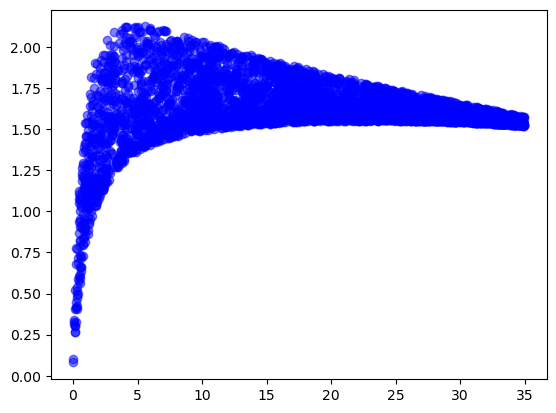

In [121]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(random_results["salinity"], random_results["saturation_aragonite"], color='blue', alpha=0.5)

plt.show()


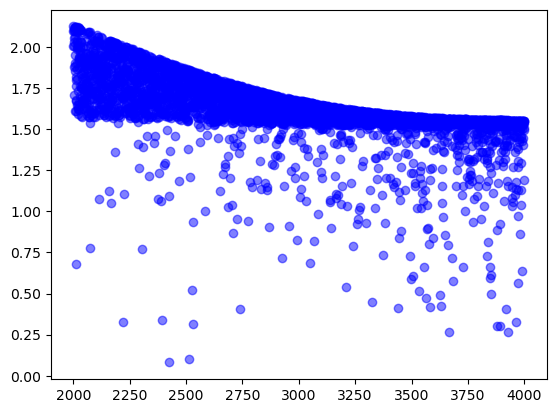

In [123]:
import matplotlib.pyplot as plt

# Plotting the scatter plot
plt.scatter(random_results["alkalinity"], random_results["saturation_aragonite"], color='blue', alpha=0.5)

plt.show()